<a href="https://colab.research.google.com/github/peaceemenike/WAAM-Bead-Geometry-Prediction/blob/main/waam_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving waam_dataset.xlsx to waam_dataset.xlsx


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD DATASET
# Replace with your actual file path
df = pd.read_excel("waam_dataset.xlsx")

print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,EXPERIMENTS,Voltage,Wire Feed Speed(WFS),Travel Speed (mm/min),CTWD (Working Distance),Sz1,Sz2,Sz3,Sz4,Sz5,Sz6,Sz7,Sz8,Sz9,Sz10,Sz11,Sz12,Sz13,AVERAGE,VARIANCE
0,1,12.0,75,100,10.5,5.00,4.35,3.46,4.22,4.21,3.33,3.44,3.08,3.91,2.75,4.01,3.60,3.46,3.755385,0.363327
1,2,12.0,75,100,10.5,3.78,3.84,3.85,3.67,3.75,3.82,4.99,3.36,3.67,3.63,3.58,3.41,3.73,3.775385,0.156444
2,3,12.0,75,100,10.5,3.68,3.45,3.53,3.63,3.86,3.70,3.84,3.81,3.79,3.93,3.75,3.78,3.74,3.730000,0.017817
3,4,14.0,100,125,11.0,3.16,3.11,3.12,3.15,3.03,3.07,2.98,3.22,3.14,3.31,3.13,3.57,3.68,3.205385,0.041727
4,5,14.0,100,125,11.0,3.18,3.12,3.12,3.45,3.15,3.09,3.38,3.23,3.18,3.40,3.64,4.01,3.87,3.370769,0.090291


In [3]:
df.columns = df.columns.str.strip()        # remove spaces
df.columns = df.columns.str.replace('\n','')
df.columns = df.columns.str.replace('\r','')
df.columns = df.columns.str.replace('  ', ' ')
df.columns = df.columns.str.replace(u'\xa0', '')  # remove non-breaking spaces


<Figure size 1200x800 with 0 Axes>

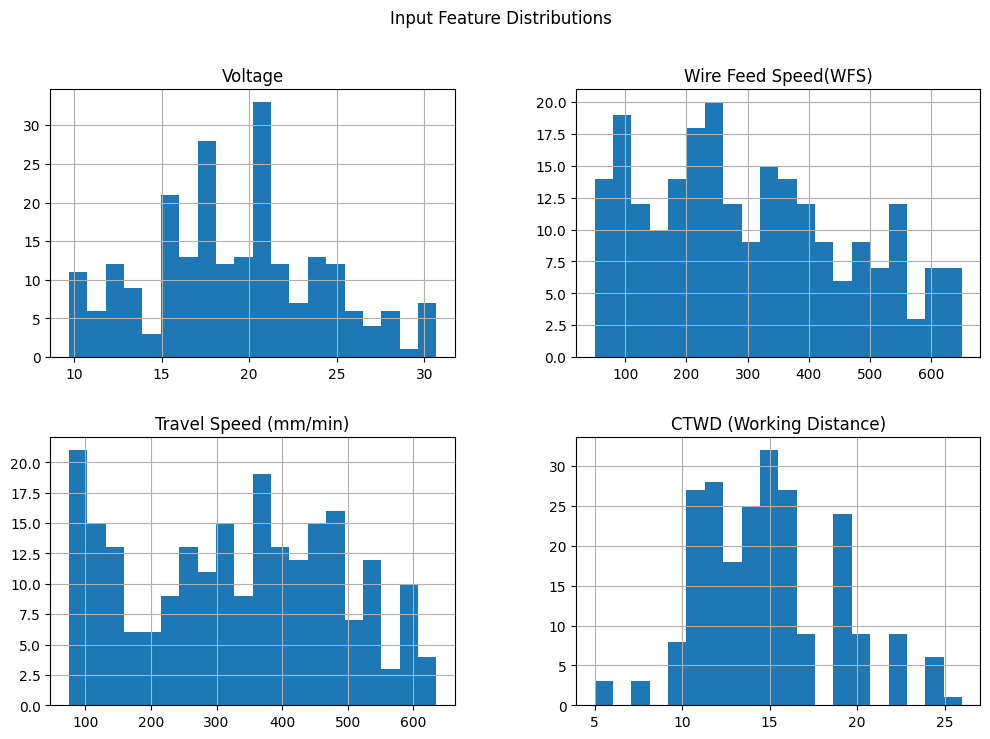

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
df[['Voltage','Wire Feed Speed(WFS)','Travel Speed (mm/min)','CTWD (Working Distance)']].hist(
    bins=20, figsize=(12,8)
)
plt.suptitle("Input Feature Distributions")
plt.show()




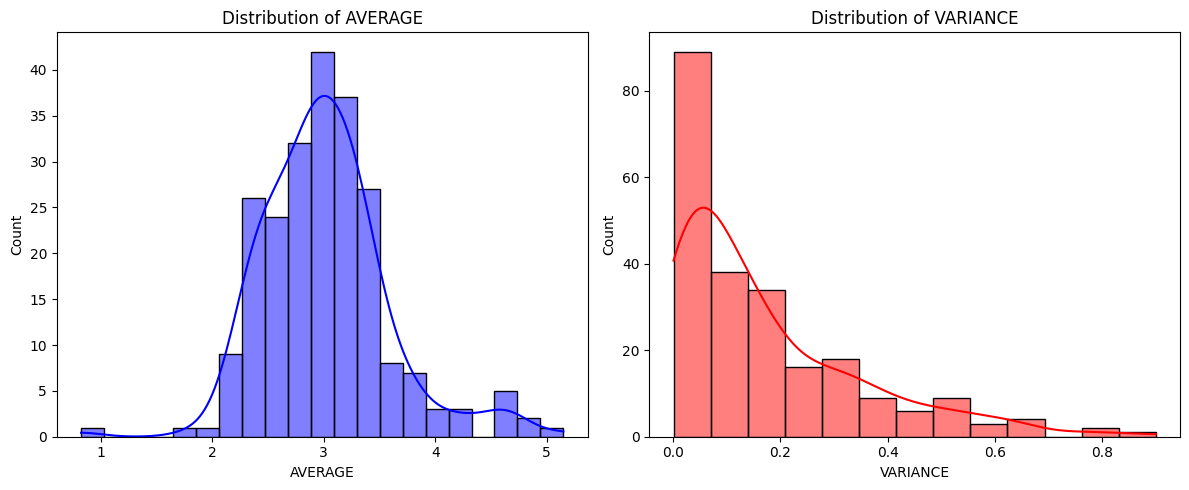

In [5]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['AVERAGE'], kde=True, color='blue')
plt.title("Distribution of AVERAGE")

plt.subplot(1,2,2)
sns.histplot(df['VARIANCE'], kde=True, color='red')
plt.title("Distribution of VARIANCE")

plt.tight_layout()
plt.show()


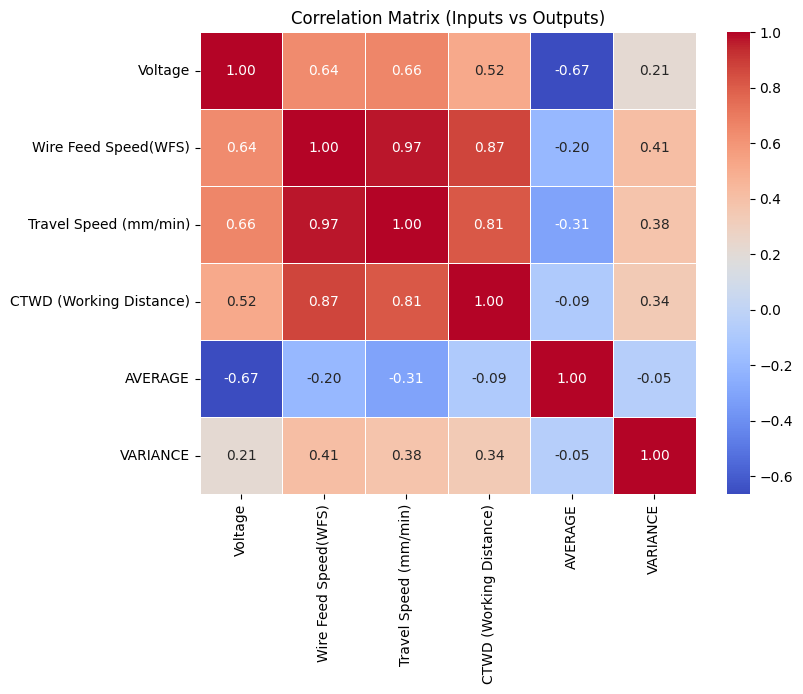

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Columns we want to keep
selected_columns = [
    'Voltage',
    'Wire Feed Speed(WFS)',
    'Travel Speed (mm/min)',
    'CTWD (Working Distance)',
    'AVERAGE',
    'VARIANCE'
]

# Filter dataframe
df_clean = df[selected_columns]

# Compute correlation
corr_clean = df_clean.corr()

# Display correlation table
corr_clean

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_clean,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix (Inputs vs Outputs)")
plt.show()




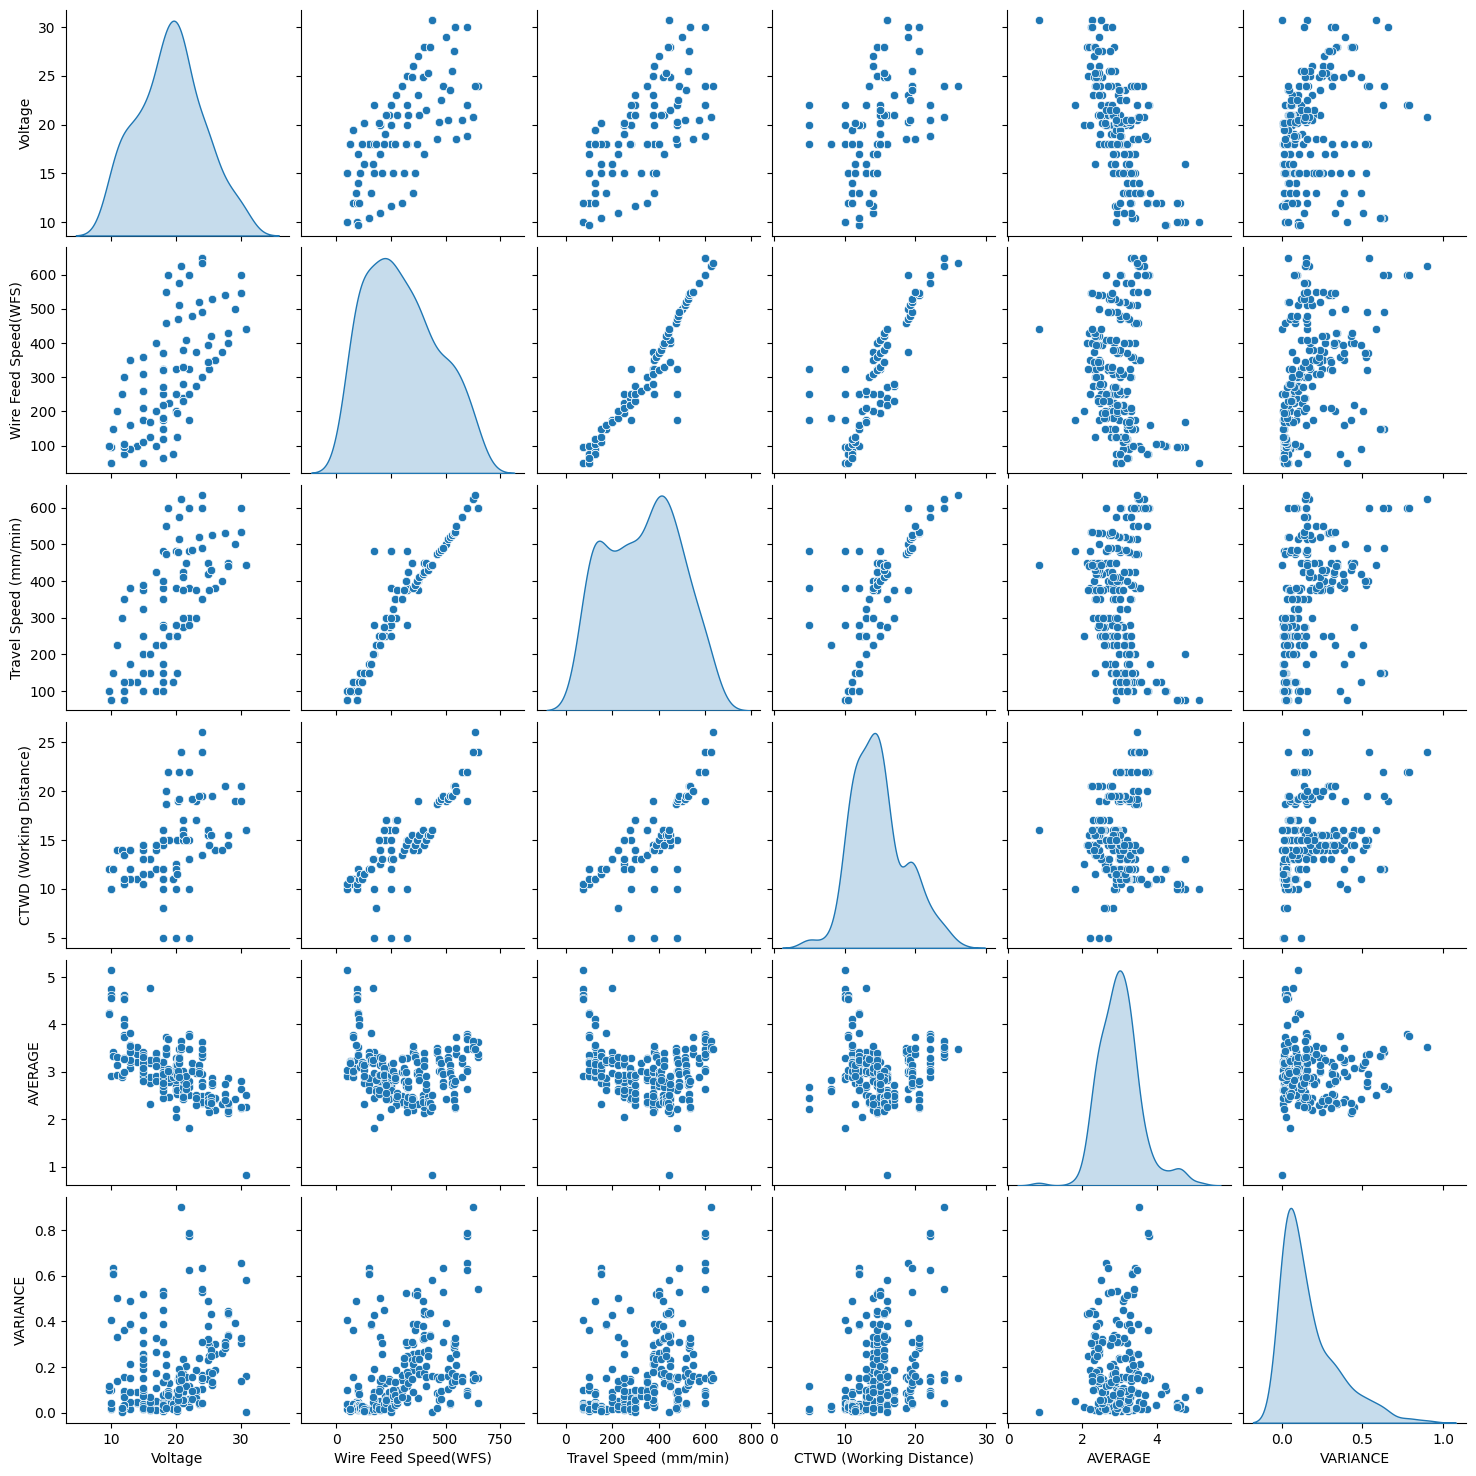

In [7]:
sns.pairplot(df[['Voltage','Wire Feed Speed(WFS)','Travel Speed (mm/min)',
                 'CTWD (Working Distance)','AVERAGE','VARIANCE']],
             diag_kind='kde')
plt.show()


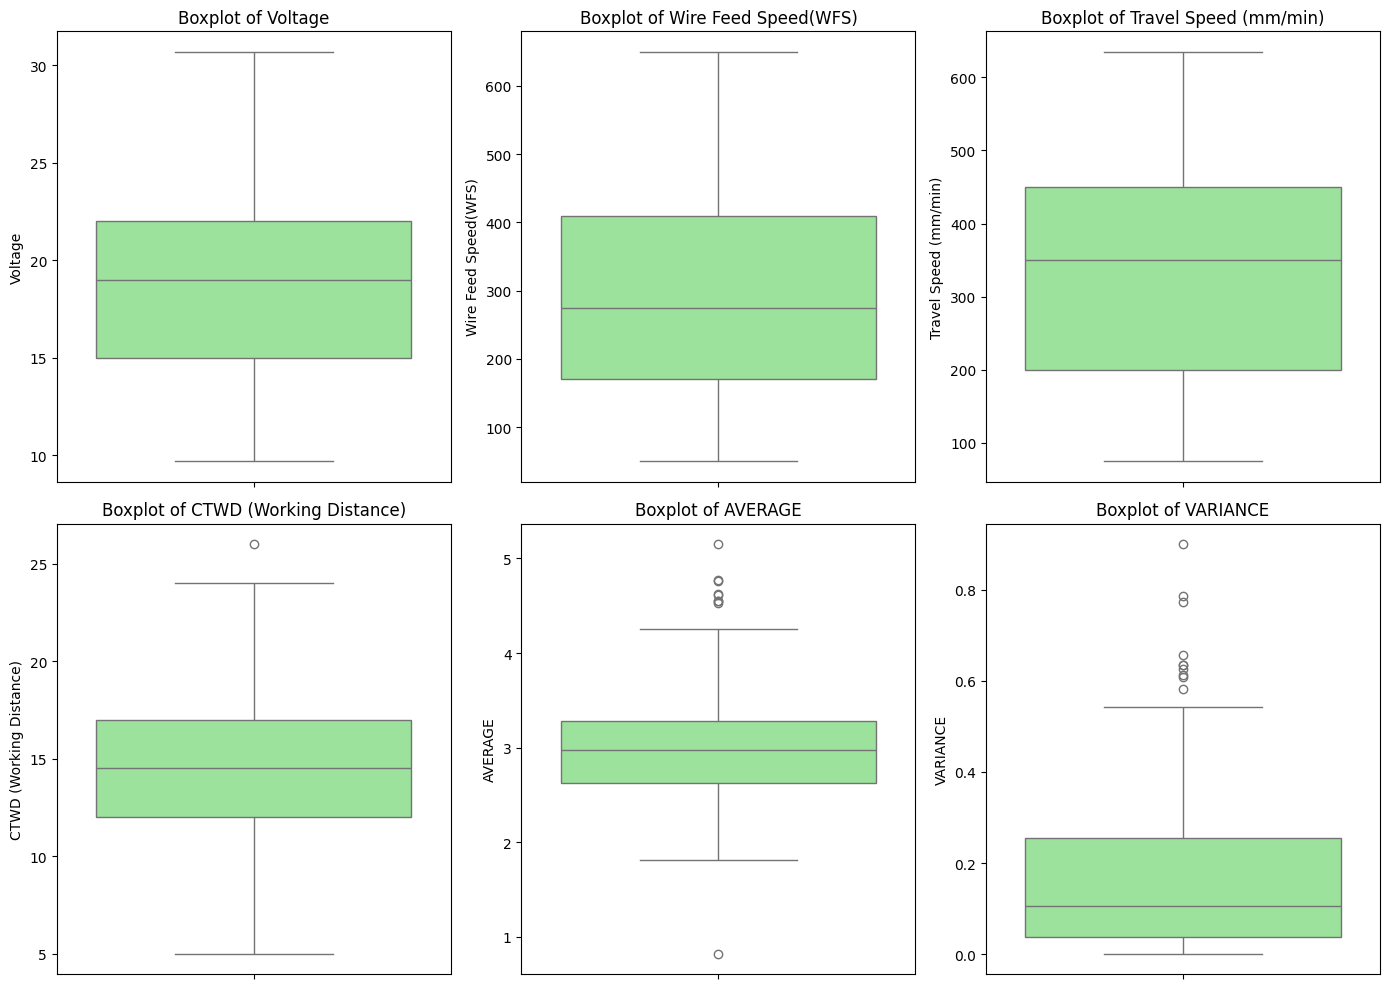

In [8]:
plt.figure(figsize=(14,10))
cols = ['Voltage','Wire Feed Speed(WFS)','Travel Speed (mm/min)',
        'CTWD (Working Distance)','AVERAGE','VARIANCE']

for i, col in enumerate(cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


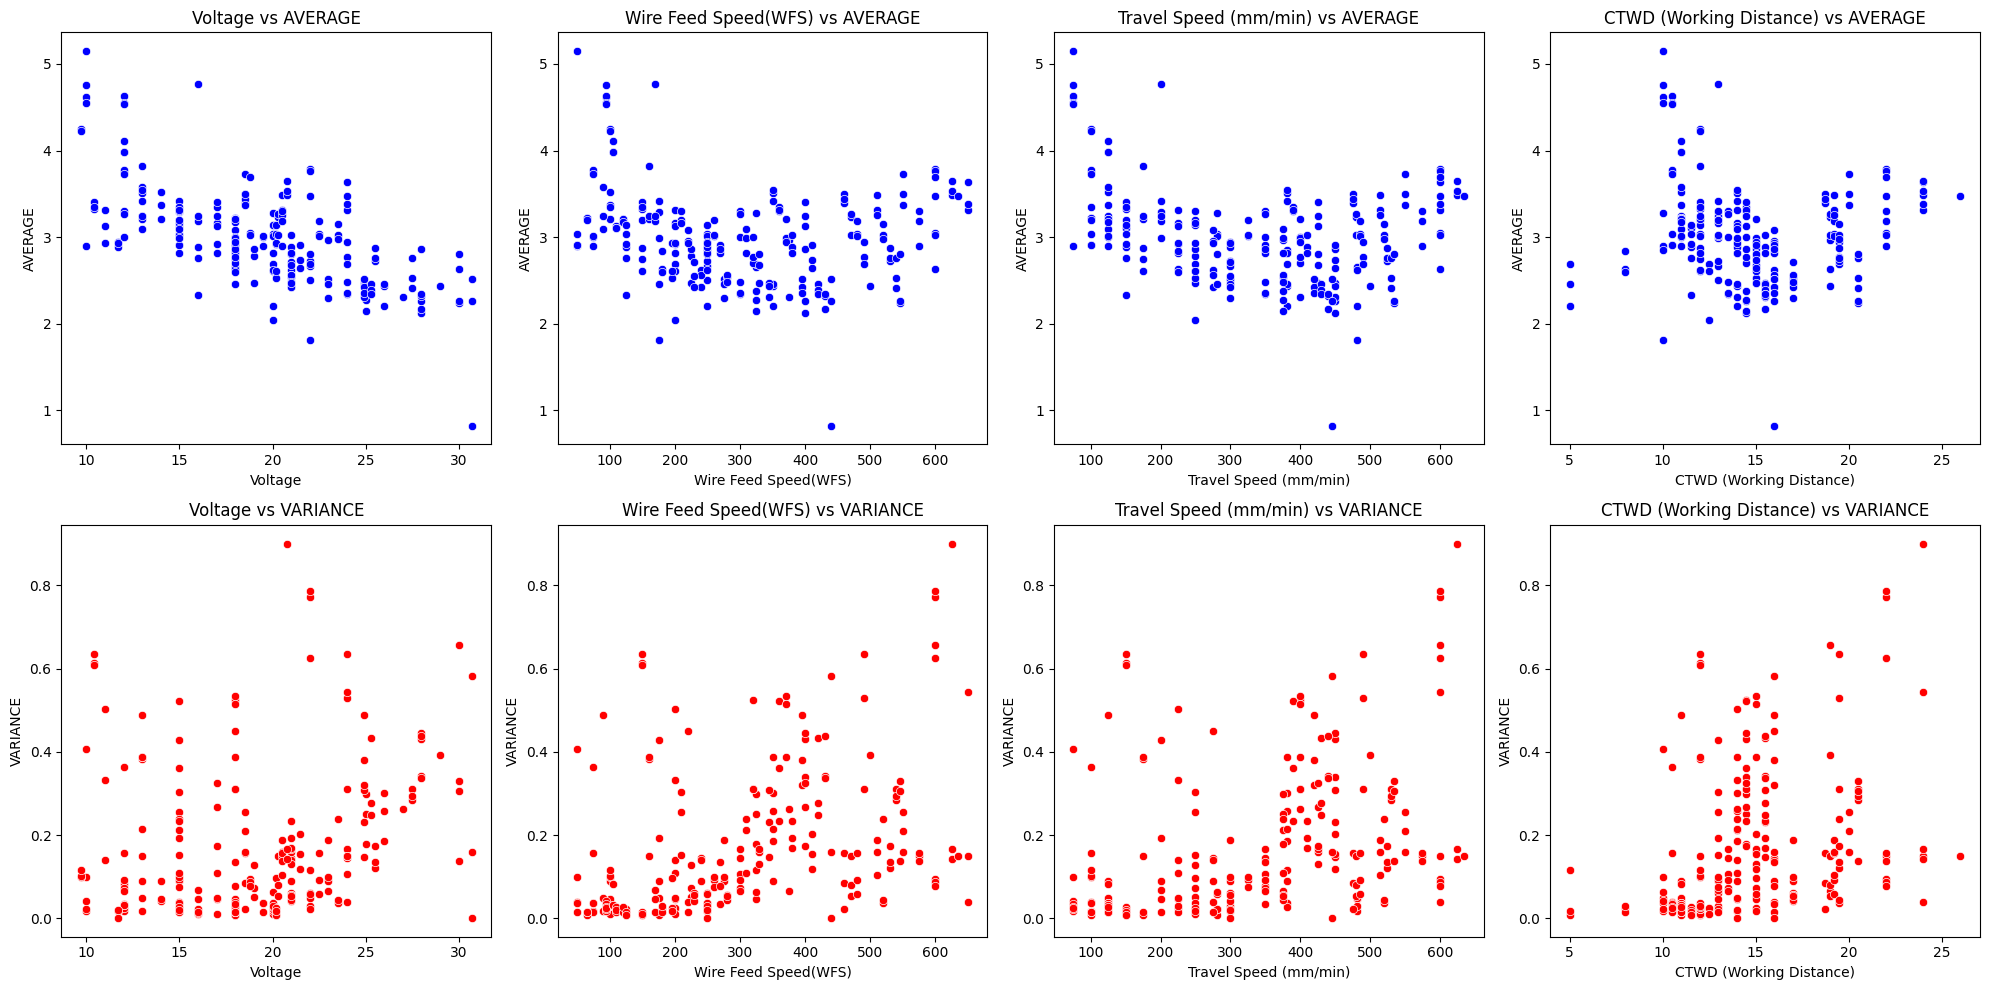

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define inputs and targets
inputs = ['Voltage', 'Wire Feed Speed(WFS)', 'Travel Speed (mm/min)', 'CTWD (Working Distance)']
targets = ['AVERAGE', 'VARIANCE']

# Create combined grid: 2 rows (AVERAGE, VARIANCE) × 4 columns (the 4 inputs)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plot: Inputs vs AVERAGE (top row)
for i, feature in enumerate(inputs):
    sns.scatterplot(
        x=df[feature],
        y=df['AVERAGE'],
        ax=axes[0, i],
        color='blue'
    )
    axes[0, i].set_title(f"{feature} vs AVERAGE")
    axes[0, i].set_xlabel(feature)
    axes[0, i].set_ylabel("AVERAGE")

# Plot: Inputs vs VARIANCE (bottom row)
for i, feature in enumerate(inputs):
    sns.scatterplot(
        x=df[feature],
        y=df['VARIANCE'],
        ax=axes[1, i],
        color='red'
    )
    axes[1, i].set_title(f"{feature} vs VARIANCE")
    axes[1, i].set_xlabel(feature)
    axes[1, i].set_ylabel("VARIANCE")

plt.tight_layout()

plt.show()


# **Random Forest Regression.**

In [10]:
# Select Features and Targets
# Inputs = First 4 features
X = df[['Voltage', 'Wire Feed Speed(WFS)', 'Travel Speed (mm/min)', 'CTWD (Working Distance)']]

# Outputs = Average & Variance
y = df[['AVERAGE', 'VARIANCE']]

print("Input shape:", X.shape)
print("Output shape:", y.shape)


Input shape: (229, 4)
Output shape: (229, 2)


In [11]:
from sklearn.model_selection import train_test_split
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.preprocessing import StandardScaler
# Scale Inputs
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.ensemble import RandomForestRegressor
# Training Random Forest Regressor
rf_avg = RandomForestRegressor(n_estimators=250, random_state=42)
rf_var = RandomForestRegressor(n_estimators=250, random_state=42)

# Train models
rf_avg.fit(X_train_scaled, y_train['AVERAGE'])
rf_var.fit(X_train_scaled, y_train['VARIANCE'])


RandomForestRegressor(n_estimators=250, random_state=42)

In [14]:
#prediction
y_pred_avg = rf_avg.predict(X_test_scaled)
y_pred_var = rf_var.predict(X_test_scaled)


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Evaluation Metrics
# AVERAGE
rmse_avg = np.sqrt(mean_squared_error(y_test['AVERAGE'], y_pred_avg))
mae_avg = mean_absolute_error(y_test['AVERAGE'], y_pred_avg)
r2_avg = r2_score(y_test['AVERAGE'], y_pred_avg)

# VARIANCE
rmse_var = np.sqrt(mean_squared_error(y_test['VARIANCE'], y_pred_var))
mae_var = mean_absolute_error(y_test['VARIANCE'], y_pred_var)
r2_var = r2_score(y_test['VARIANCE'], y_pred_var)

print("===== AVERAGE (Bead Height) =====")
print("RMSE:", rmse_avg)
print("MAE:", mae_avg)
print("R² Score:", r2_avg)

print("\n===== VARIANCE (Bead Stability) =====")
print("RMSE:", rmse_var)
print("MAE:", mae_var)
print("R² Score:", r2_var)


===== AVERAGE (Bead Height) =====
RMSE: 0.28728440642773606
MAE: 0.16895260559819406
R² Score: 0.6866888130159863

===== VARIANCE (Bead Stability) =====
RMSE: 0.10860591546217038
MAE: 0.0744683023060628
R² Score: 0.6013342922660647


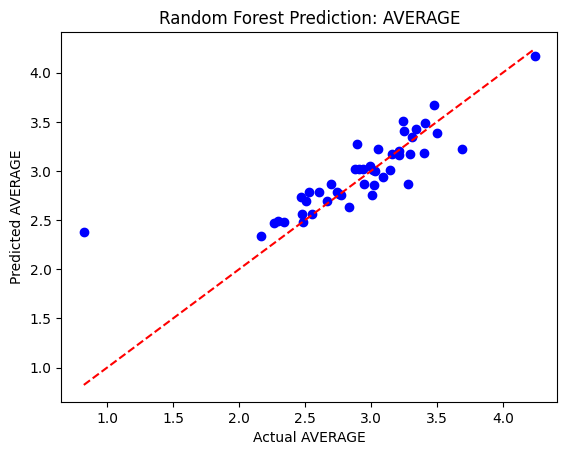

In [16]:
# Plot Actual vs Predicted
plt.scatter(y_test['AVERAGE'], y_pred_avg, color='blue')
plt.xlabel("Actual AVERAGE")
plt.ylabel("Predicted AVERAGE")
plt.title("Random Forest Prediction: AVERAGE")
plt.plot([y_test['AVERAGE'].min(), y_test['AVERAGE'].max()],
         [y_test['AVERAGE'].min(), y_test['AVERAGE'].max()],
         'r--')
plt.show()


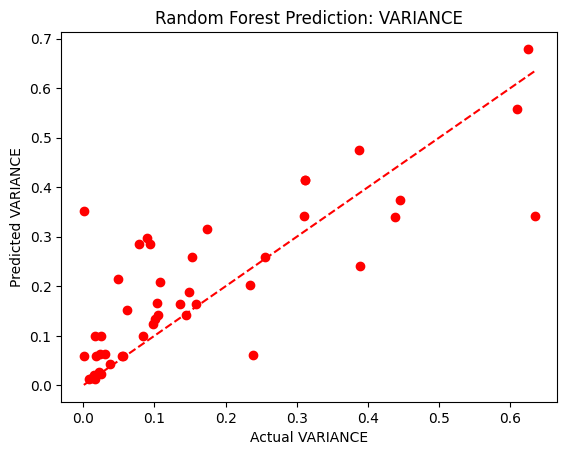

In [17]:
# VARIANCE
plt.scatter(y_test['VARIANCE'], y_pred_var, color='red')
plt.xlabel("Actual VARIANCE")
plt.ylabel("Predicted VARIANCE")
plt.title("Random Forest Prediction: VARIANCE")
plt.plot([y_test['VARIANCE'].min(), y_test['VARIANCE'].max()],
         [y_test['VARIANCE'].min(), y_test['VARIANCE'].max()],
         'r--')
plt.show()


# Deep Learning Model Using Keras (TensorFlow)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [19]:
# Building the Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2)   # output layer: [AVERAGE, VARIANCE]
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,962 (11.57 KB)

 Trainable params: 2,962 (11.57 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Training the Model
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.1469 - val_loss: 3.2387
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7016 - val_loss: 1.8524
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4803 - val_loss: 0.7677
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7337 - val_loss: 0.4711
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5664 - val_loss: 0.4495
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4553 - val_loss: 0.3637
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3845 - val_loss: 0.3254
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3228 - val_loss: 0.2799
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2815 - val_loss: 0.2396
Epoch 10/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2484 - val_loss: 0.2105
Epoch 11/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2178 - val_loss: 0.1847
Epoch 12/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

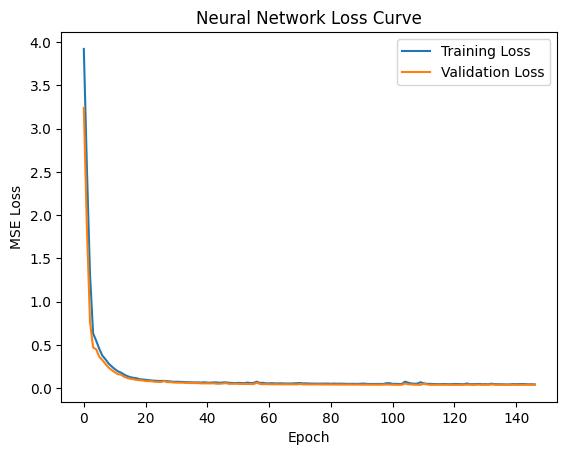

In [21]:
# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Neural Network Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


In [22]:
# Predictions
y_pred_dl = model.predict(X_test_scaled)

y_pred_avg_dl = y_pred_dl[:, 0]
y_pred_var_dl = y_pred_dl[:, 1]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [23]:
# Evaluation Metrics
# AVERAGE
rmse_avg_dl = np.sqrt(mean_squared_error(y_test['AVERAGE'], y_pred_avg_dl))
mae_avg_dl = mean_absolute_error(y_test['AVERAGE'], y_pred_avg_dl)
r2_avg_dl = r2_score(y_test['AVERAGE'], y_pred_avg_dl)

# VARIANCE
rmse_var_dl = np.sqrt(mean_squared_error(y_test['VARIANCE'], y_pred_var_dl))
mae_var_dl = mean_absolute_error(y_test['VARIANCE'], y_pred_var_dl)
r2_var_dl = r2_score(y_test['VARIANCE'], y_pred_var_dl)

print("===== DEEP LEARNING: AVERAGE =====")
print("RMSE:", rmse_avg_dl)
print("MAE:", mae_avg_dl)
print("R²:", r2_avg_dl)

print("\n===== DEEP LEARNING: VARIANCE =====")
print("RMSE:", rmse_var_dl)
print("MAE:", mae_var_dl)
print("R²:", r2_var_dl)


===== DEEP LEARNING: AVERAGE =====
RMSE: 0.31314718810260705
MAE: 0.19564318981049864
R²: 0.6277378959888995

===== DEEP LEARNING: VARIANCE =====
RMSE: 0.15503177209894126
MAE: 0.11379841284335514
R²: 0.18764970698220906


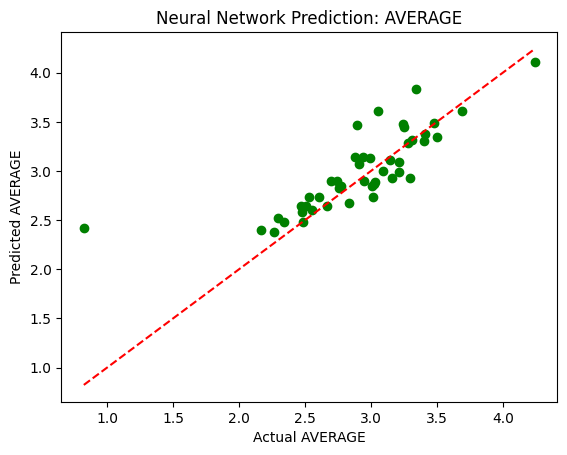

In [24]:
#scatter plot
plt.scatter(y_test['AVERAGE'], y_pred_avg_dl, color='green')
plt.plot([y_test['AVERAGE'].min(), y_test['AVERAGE'].max()],
         [y_test['AVERAGE'].min(), y_test['AVERAGE'].max()],
         'r--')
plt.xlabel("Actual AVERAGE")
plt.ylabel("Predicted AVERAGE")
plt.title("Neural Network Prediction: AVERAGE")
plt.show()


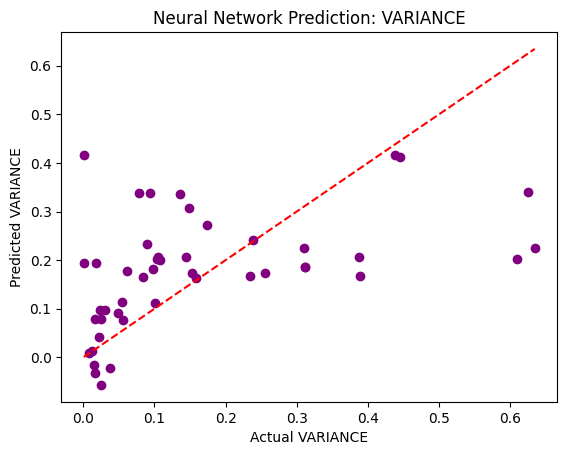

In [25]:
# Variance
plt.scatter(y_test['VARIANCE'], y_pred_var_dl, color='purple')
plt.plot([y_test['VARIANCE'].min(), y_test['VARIANCE'].max()],
         [y_test['VARIANCE'].min(), y_test['VARIANCE'].max()],
         'r--')
plt.xlabel("Actual VARIANCE")
plt.ylabel("Predicted VARIANCE")
plt.title("Neural Network Prediction: VARIANCE")
plt.show()


# **Comparism**

In [26]:
# Comparison Table
comparison = pd.DataFrame({
    "Model": ["Random Forest (AVG)", "Neural Network (AVG)",
              "Random Forest (VAR)", "Neural Network (VAR)"],
    "RMSE": [rmse_avg, rmse_avg_dl, rmse_var, rmse_var_dl],
    "MAE": [mae_avg, mae_avg_dl, mae_var, mae_var_dl],
    "R² Score": [r2_avg, r2_avg_dl, r2_var, r2_var_dl]
})

comparison


,Model,RMSE,MAE,R² Score
0,Random Forest (AVG),0.287284,0.168953,0.686689
1,Neural Network (AVG),0.313147,0.195643,0.627738
2,Random Forest (VAR),0.108606,0.074468,0.601334
3,Neural Network (VAR),0.155032,0.113798,0.187650


In [27]:
# Feature Importance for Random Forest
importances_avg = rf_avg.feature_importances_
importances_var = rf_var.feature_importances_

features = ['Voltage', 'Wire Feed Speed', 'Travel Speed', 'CTWD']

for name, importance in zip(features, importances_avg):
    print(f"AVG - {name}: {importance:.4f}")

for name, importance in zip(features, importances_var):
    print(f"VAR - {name}: {importance:.4f}")


AVG - Voltage: 0.5312
AVG - Wire Feed Speed: 0.1716
AVG - Travel Speed: 0.2227
AVG - CTWD: 0.0745
VAR - Voltage: 0.3442
VAR - Wire Feed Speed: 0.4166
VAR - Travel Speed: 0.1448
VAR - CTWD: 0.0944


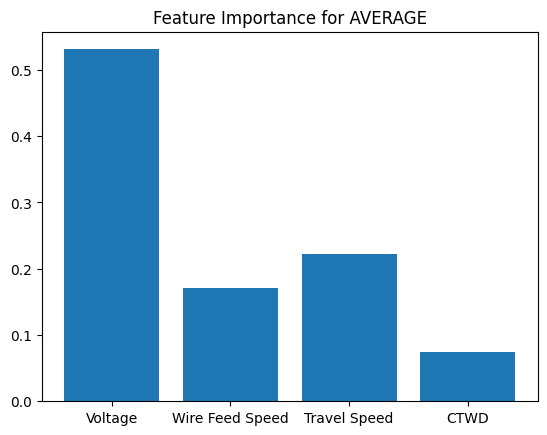

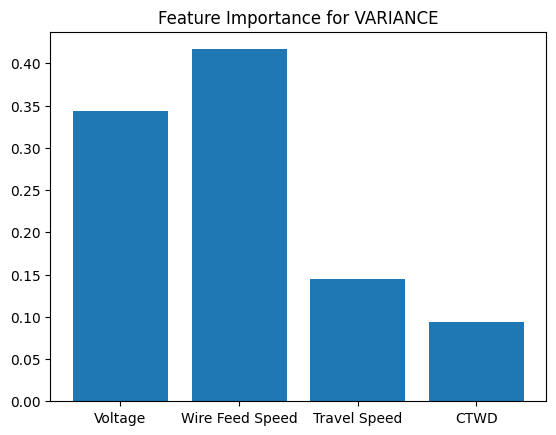

In [28]:
# Bar plot
plt.bar(features, importances_avg)
plt.title("Feature Importance for AVERAGE")
plt.show()

plt.bar(features, importances_var)
plt.title("Feature Importance for VARIANCE")
plt.show()


In [29]:
import joblib

joblib.dump(rf_avg, "rf_avg_model.pkl")
joblib.dump(rf_var, "rf_var_model.pkl")


['rf_var_model.pkl']

In [30]:
model.save("waam_nn_model.h5")
model.save("waam_nn_model.keras")



# **Predicting NEW WAAM PARAMETERS**

In [31]:
# Predicting NEW WAAM PARAMETERS
def predict_bead_shape(voltage, wfs, travel_speed, ctwd):

    # create dataframe with correct feature names
    X_new = pd.DataFrame([{
        'Voltage': voltage,
        'Wire Feed Speed(WFS)': wfs,
        'Travel Speed (mm/min)': travel_speed,
        'CTWD (Working Distance)': ctwd
    }])

    # scale
    X_new_scaled = scaler.transform(X_new)

    # RF predictions
    pred_rf_avg = rf_avg.predict(X_new_scaled)[0]
    pred_rf_var = rf_var.predict(X_new_scaled)[0]

    # NN predictions
    pred_nn = model.predict(X_new_scaled)[0]
    pred_nn_avg = pred_nn[0]
    pred_nn_var = pred_nn[1]

    return {
        "RF_AVERAGE": pred_rf_avg,
        "RF_VARIANCE": pred_rf_var,
        "NN_AVERAGE": pred_nn_avg,
        "NN_VARIANCE": pred_nn_var
    }

In [32]:
predict_bead_shape(20, 300, 400, 14)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


{'RF_AVERAGE': np.float64(2.7284608205179124),
 'RF_VARIANCE': np.float64(0.09784459030595725),
 'NN_AVERAGE': np.float32(2.5679827),
 'NN_VARIANCE': np.float32(0.12880728)}

In [36]:
#lets compare with the one above
predict_bead_shape(10, 200, 300, 10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


{'RF_AVERAGE': np.float64(3.379427422334185),
 'RF_VARIANCE': np.float64(0.2807383565599404),
 'NN_AVERAGE': np.float32(3.0833435),
 'NN_VARIANCE': np.float32(0.16302598)}

In [33]:
import joblib
joblib.dump(rf_avg, "waam_rf_avg.pkl")
joblib.dump(rf_var, "waam_rf_var.pkl")


['waam_rf_var.pkl']

In [34]:
joblib.dump(scaler, "waam_scaler.pkl")

['waam_scaler.pkl']

In [35]:
import os

os.makedirs("figures", exist_ok=True)
print("Folder created.")


Folder created.
